# CoderHouse - Grupo 7 - Análisis Bivariado

* <b>Profesor:</b> David Romero Acosta

* <b>Tutoria:</b> Hector Ponce Schwarz

<b>Alumnos:</b>
* Juan Pascual
* Lucas Ariel Saavedra
* Bartolome Oscar Meritello
* Jose Mornaghi

Arrancamos el analisis importando todo lo que necesitamos y desactivamos los carteles de Warnings. Tambien, creamos las funciones que vamos a usar en todo el notebook para ahorrar codigo.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
def boxPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.boxplot(dataset[target], dataset[variable], palette = 'viridis')
    plt.title(f'{target} vs {variable}', fontsize = 20)
    plt.show()

def violinPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.violinplot(dataset[target], dataset[variable], palette = 'colorblind')
    plt.title(f'Relación entre {variable} y {target}', fontsize = 20, fontweight = 30)
    plt.show()

In [5]:
data = pd.read_csv('stroke_imputed.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.600000
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.893237
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.500000
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.400000
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.893237
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.000000
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.600000
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.600000


In [4]:
data.shape

(5109, 11)

In [5]:
data.count()

gender               5109
age                  5109
hypertension         5109
heart_disease        5109
ever_married         5109
work_type            5109
Residence_type       5109
avg_glucose_level    5109
smoking_status       5109
stroke               5109
bmi                  5109
dtype: int64

In [6]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
smoking_status        object
stroke                 int64
bmi                  float64
dtype: object

Procedemos a reemplazar valores númericos dentro de las variables categoricas para poder realizar el heatmap 

In [7]:
data.stroke = data.stroke.replace({0:'Non-Stroke',1:'Stroke'})
data.heart_disease = data.heart_disease.replace({0:'No',1:'Yes'})
data.hypertension = data.hypertension.replace({0:'No',1:'Yes'})
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,formerly smoked,Stroke,36.600000
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,never smoked,Stroke,28.893237
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,never smoked,Stroke,32.500000
3,Female,49.0,No,No,Yes,Private,Urban,171.23,smokes,Stroke,34.400000
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,never smoked,Stroke,24.000000


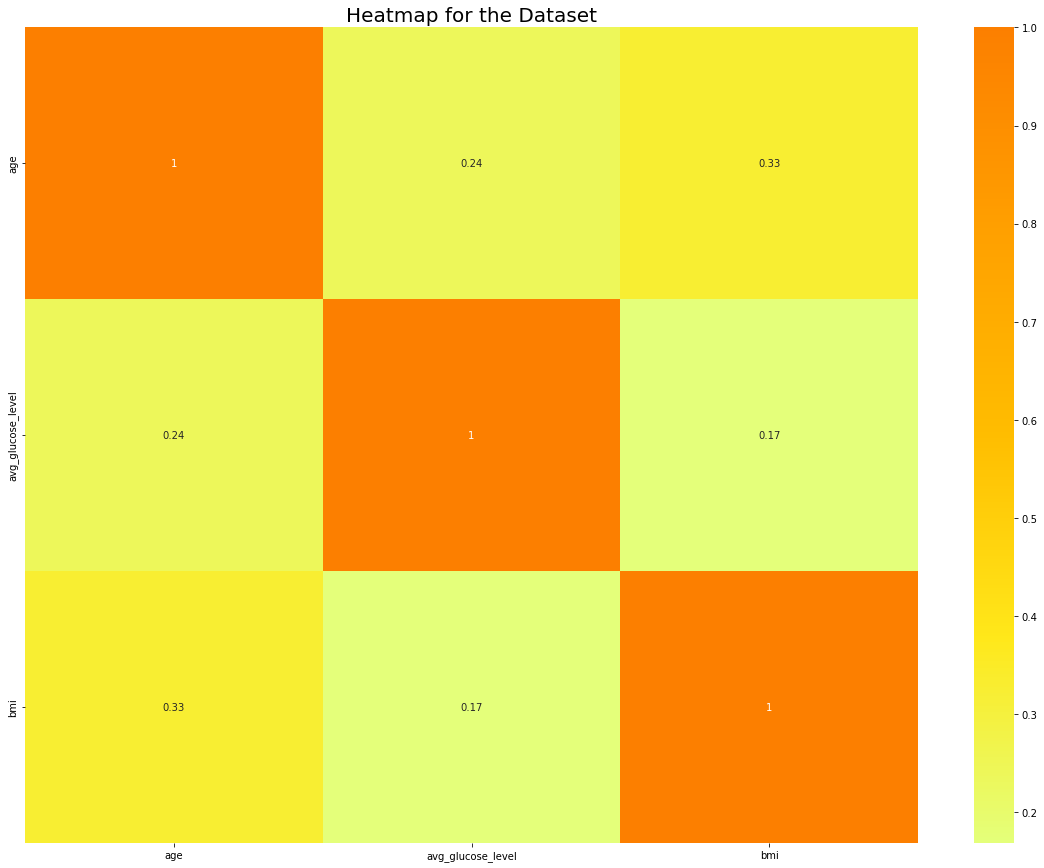

In [8]:
#HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## Númerica vs Categórica

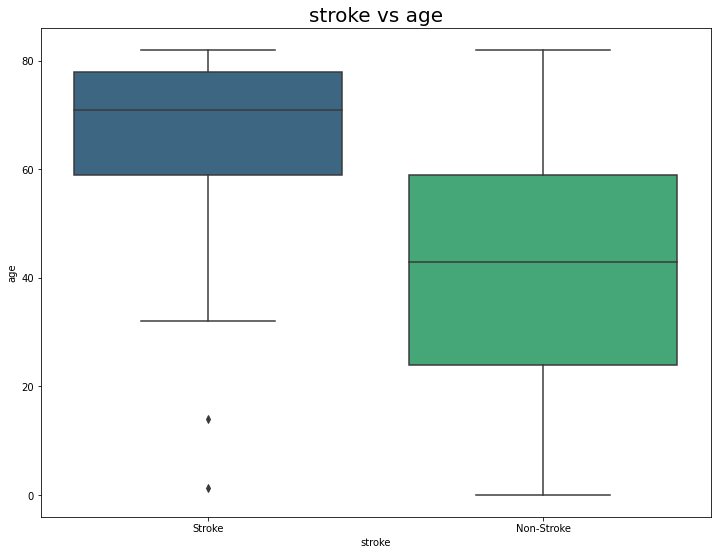

In [9]:
# age vs target
boxPlotComparison(data,'stroke','age')

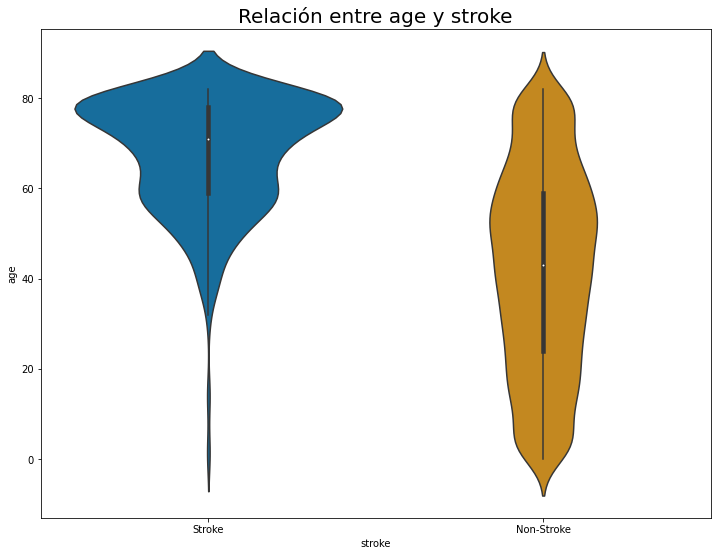

In [10]:
# age vs target
violinPlotComparison(data, 'stroke', 'age')

Podemos apreciar una clara influencia de la edad en las personas que sufrieron un stroke

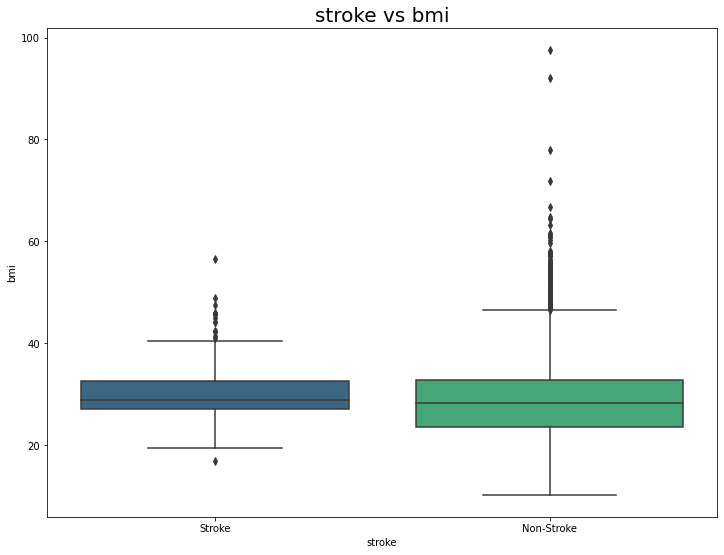

In [11]:
# bmi vs target
boxPlotComparison(data,'stroke','bmi')

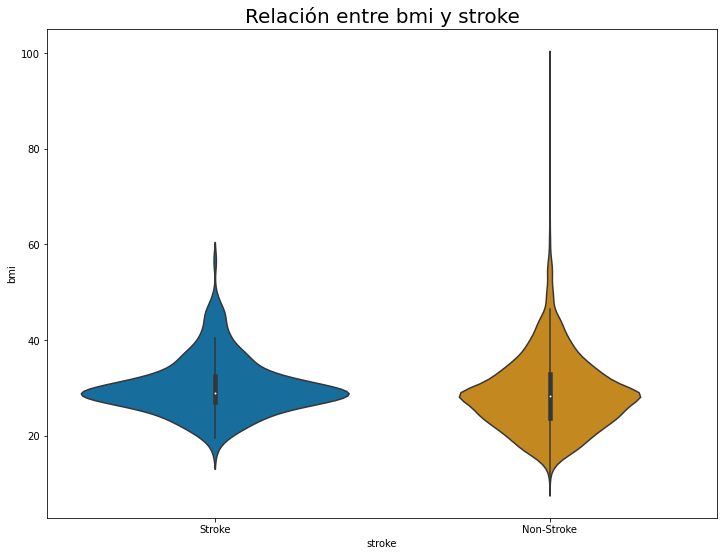

In [12]:
# bmi vs target
violinPlotComparison(data, 'stroke', 'bmi')

En este caso no podemos visualizar una influencia del bmi en la variable stroke

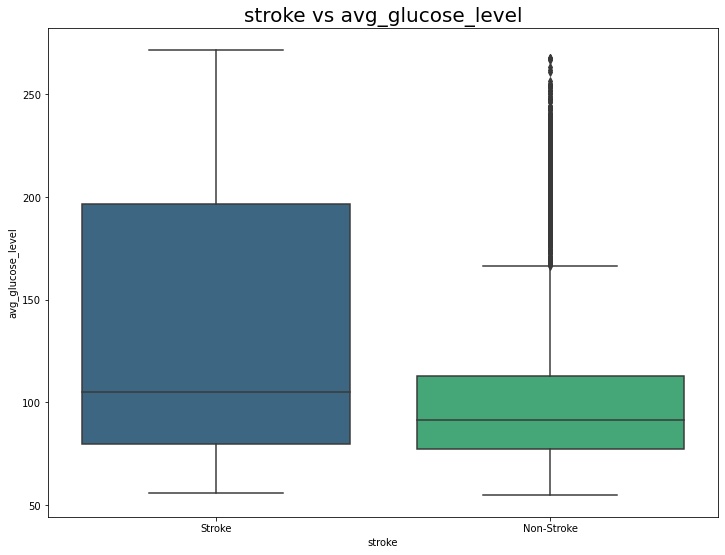

In [13]:
# avg_glucose_level vs target
boxPlotComparison(data,'stroke','avg_glucose_level')

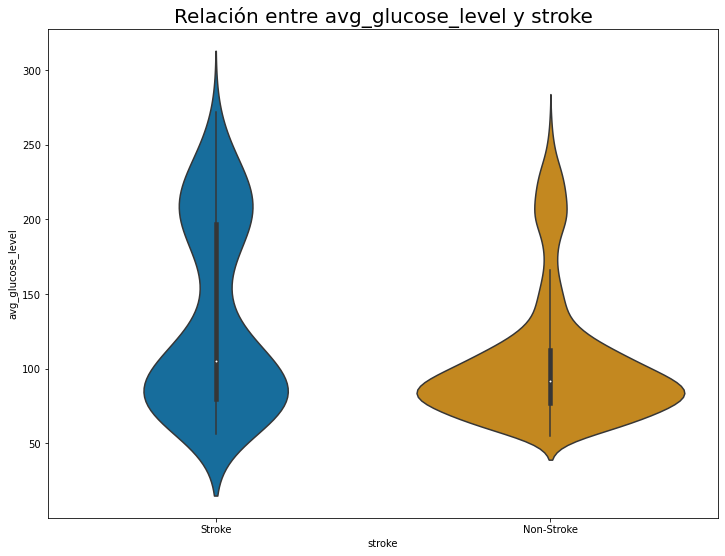

In [14]:
# avg_glucose_level vs target
violinPlotComparison(data, 'stroke', 'avg_glucose_level')

Acá podemos apreciar una leve influencia de la variable avg_glucose_level (nivel de glucosa en sangre) sobre si una persona tuvo un stroke o no, la mayoría de los sujetos con un avg_glucose_level superior a 100 tuvieron un stroke.

## Categórica vs. categórica

In [15]:
pd.crosstab(data['stroke'], data['ever_married'])

ever_married,No,Yes
stroke,,
Non-Stroke,1727,3133
Stroke,29,220


In [16]:
pd.crosstab(data['stroke'], data['ever_married'], normalize=True) 

ever_married,No,Yes
stroke,,
Non-Stroke,0.338031,0.613232
Stroke,0.005676,0.043061


Podemos apreciar que aquellos sujetos que se casaron alguna vez tienen significativamente más probabilidades de sufrir un stroke frente aquellos que nunca lo hicieron

In [17]:
pd.crosstab(data['stroke'], data['smoking_status'])

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
Non-Stroke,1497,814,1802,747
Stroke,47,70,90,42


In [18]:
pd.crosstab(data['stroke'], data['smoking_status'], normalize=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
Non-Stroke,0.293012,0.159327,0.352711,0.146213
Stroke,0.009199,0.013701,0.017616,0.008221


En esta ocasión no podemos sacar conclusiones definitorias según los datos

In [19]:
pd.crosstab(data['stroke'], data['work_type'])

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
Non-Stroke,624,22,2775,754,685
Stroke,33,0,149,65,2


In [20]:
pd.crosstab(data['stroke'], data['work_type'],normalize=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
Non-Stroke,0.122137,0.004306,0.543159,0.147583,0.134077
Stroke,0.006459,0.000000,0.029164,0.012723,0.000391


Acá podemos obsbervar que aquellos pertenecientes a la categoria "self-employed" tienen en cierta medida mayor probabilidad de sufrir un stroke frente a las demás categorias

In [21]:
pd.crosstab(data['stroke'], data['heart_disease'])

heart_disease,No,Yes
stroke,,
Non-Stroke,4631,229
Stroke,202,47


In [22]:
pd.crosstab(data['stroke'], data['heart_disease'],normalize=True)

heart_disease,No,Yes
stroke,,
Non-Stroke,0.906440,0.044823
Stroke,0.039538,0.009199


En esta ocasión la tendencia es clara, aquellos que sufren una enfermedad del corazón tienen significativamente más probabilidades de sufrir un stroke

In [23]:
pd.crosstab(data['stroke'], data['hypertension'])

hypertension,No,Yes
stroke,,
Non-Stroke,4428,432
Stroke,183,66


In [24]:
pd.crosstab(data['stroke'], data['hypertension'], normalize=True)

hypertension,No,Yes
stroke,,
Non-Stroke,0.866706,0.084557
Stroke,0.035819,0.012918


Aquí también podemos apreciar una tendencia similar a la de heart_disease, donde aquellos que sufren de hipertensión son más propensos a padecer un stroke

In [25]:
pd.crosstab(data['stroke'], data['gender'])

gender,Female,Male
stroke,,
Non-Stroke,2853,2007
Stroke,141,108


In [26]:
pd.crosstab(data['stroke'], data['gender'], normalize=True)

gender,Female,Male
stroke,,
Non-Stroke,0.558426,0.392836
Stroke,0.027598,0.021139


Acá no podemos evidenciar tendencia alguna entre los géneros frente a la variable stoke

In [27]:
pd.crosstab(data['stroke'], data['Residence_type'])

Residence_type,Rural,Urban
stroke,,
Non-Stroke,2399,2461
Stroke,114,135


In [28]:
pd.crosstab(data['stroke'], data['Residence_type'], normalize=True)

Residence_type,Rural,Urban
stroke,,
Non-Stroke,0.469564,0.481699
Stroke,0.022314,0.026424


Cómo en el caso anterior, no podemos encontrar una tendencia notoria entre las categorias frente a la variable stroke